# Made with ML

- https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/madewithml.ipynb
- https://madewithml.com/

In [1]:
# import os
# import sys
# import time
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# from scipy import stats
# import warnings; warnings.filterwarnings('ignore')
# #plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
# %matplotlib inline

# 2. Data
## 2.1 Preparation

### Intuition

Î®ºÏ†Ä ÏÜåÏä§ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïòÍ≥† ÌïôÏäµ, Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Î°ú Î∂ÑÌï†ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌïòÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§.

#### Ingestion

In [2]:
import pandas as pd

In [3]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)

In [4]:
df.head()

id           created_on                                              title   
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...  \
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

#### Splitting

Îã§ÏùåÏúºÎ°ú, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Í≥º Í∞í Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Î°ú Î∂ÑÌï†Ìï¥Ïïº Ìï©ÎãàÎã§.

1. ÌõàÎ†® Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï©ÎãàÎã§.
    - Ïó¨Í∏∞ÏÑú Î™®Îç∏ÏùÄ ÎÇ¥Î∂Ä Í∞ÄÏ§ëÏπòÎ•º ÏµúÏ†ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÏûÖÎ†•(Í∏∞Îä•)Í≥º Ï∂úÎ†•(Î†àÏù¥Î∏î) Î™®ÎëêÏóê Ïï°ÏÑ∏Ïä§Ìï† Ïàò ÏûàÏäµÎãàÎã§.

2. ÌõàÎ†® Î∂ÑÌï†ÏùÑ ÌÜµÌïú Í∞Å Î∞òÎ≥µ(ÏóêÌè¨ÌÅ¨) ÌõÑÏóêÎäî Í∞í Î∂ÑÌï†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§.
    - Ïó¨Í∏∞ÏÑú Î™®Îç∏ÏùÄ Í∞ÄÏ§ëÏπòÎ•º ÏµúÏ†ÅÌôîÌïòÎäî Îç∞ Î†àÏù¥Î∏îÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÎåÄÏã† Í≤ÄÏ¶ù ÏÑ±Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ ÏÜçÎèÑ Îì±Í≥º Í∞ôÏùÄ ÌïôÏäµ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏµúÏ†ÅÌôîÌï©ÎãàÎã§.

3. ÎßàÏßÄÎßâÏúºÎ°ú, Î≥ÑÎèÑÏùò ÌôÄÎìúÏïÑÏõÉ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® ÌõÑ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
    - Ïù¥Îäî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏôÄ Ïú†ÏÇ¨Ìïú Î∂ÑÌè¨Ïùò ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏Ïù¥ Ïñ¥ÎñªÍ≤å ÏûëÎèôÌï† Ïàò ÏûàÎäîÏßÄÏóê ÎåÄÌïú Í∞ÄÏû• Ï¢ãÏùÄ Ï≤ôÎèÑÏûÖÎãàÎã§.

Ïù¥ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùò Í≤ΩÏö∞, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÌõàÎ†® Î∞è val Î∂ÑÌï†Î°ú Î∂ÑÌï†ÌïòÍ≥† ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î•º ÏúÑÌïú Î≥ÑÎèÑÏùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Í∞ñÍ≤å Îê©ÎãàÎã§.  
ÌïòÎÇòÏùò ÌÅ∞ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Í∞ÄÏßÄÍ≥† Ïù¥Î•º ÏÑ∏ Í∞úÏùò Î∂ÑÌï†Î°ú Î∂ÑÌï†Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå, Î≥ÑÎèÑÏùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Í∞ñÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.  
ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¶ùÍ∞ÄÌïòÏó¨ ÌÖåÏä§Ìä∏ Î∂ÑÌï†Ïù¥ Îß§Î≤à Îã§Î•¥Í≤å Î≥¥Ïùº Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å ÎêòÎ©¥ Î™®Îç∏ÏùÑ Îã§Î•∏ Î™®Îç∏Í≥º ÎπÑÍµêÌïòÍ±∞ÎÇò ÏÑúÎ°ú ÎπÑÍµêÌïòÍ∏∞Í∞Ä Ïñ¥Î†§ÏõåÏßëÎãàÎã§.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.head()

id           created_on                                              title   
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...  \
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

In [7]:
df.dtypes

id              int64
created_on     object
title          object
description    object
tag            object
dtype: object

In [8]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÏûëÏóÖ(Í∞Å ÌîÑÎ°úÏ†ùÌä∏Ïóê Ï†ïÌôïÌûà ÌïòÎÇòÏùò ÌÉúÍ∑∏Í∞Ä ÏûàÎäî Í≤ΩÏö∞)Ïùò Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Ïù¥ Ïú†ÏÇ¨Ìïú ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º Í∞ñÎèÑÎ°ù ÌïòÍ≥† Ïã∂ÏäµÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑúÎäî sklearnÏùò train_test_split() Ìï®ÏàòÏôÄ Ìï®Íªò stratify ÌÇ§ÏõåÎìú Ïù∏ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÌï†ÏùÑ Í≥ÑÏ∏µÌôîÌïòÎäî Î∞©Î≤ïÏùÑ ÏßÄÏ†ïÌïòÎ©¥ Îê©ÎãàÎã§.

In [9]:
# Split dataset
test_size = 0.2
train_df, val_df = train_test_split(
    df, 
    stratify=df.tag, 
    test_size=test_size, 
    random_state=1234
    )

In [10]:
train_df.tag.value_counts()

tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64

Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨ Î∂ÑÌï†Ïùò ÌÅ¥ÎûòÏä§ ÏàòÎ•º Î≥¥Í∏∞ Ï†ÑÏóê, Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨ Î∂ÑÌï†ÏùÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò test_sizeÏóê Î∂àÍ≥ºÌïòÎã§Îäî Ï†êÏùÑ Í∏∞ÏñµÌïòÏÑ∏Ïöî.  
Îî∞ÎùºÏÑú ÌõàÎ†® Î∂ÑÌï†Ïùò ÌÅ¥ÎûòÏä§ ÏàòÏôÄ ÎπÑÍµêÌï† Ïàò ÏûàÎèÑÎ°ù Í∞í ÏàòÎ•º Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.

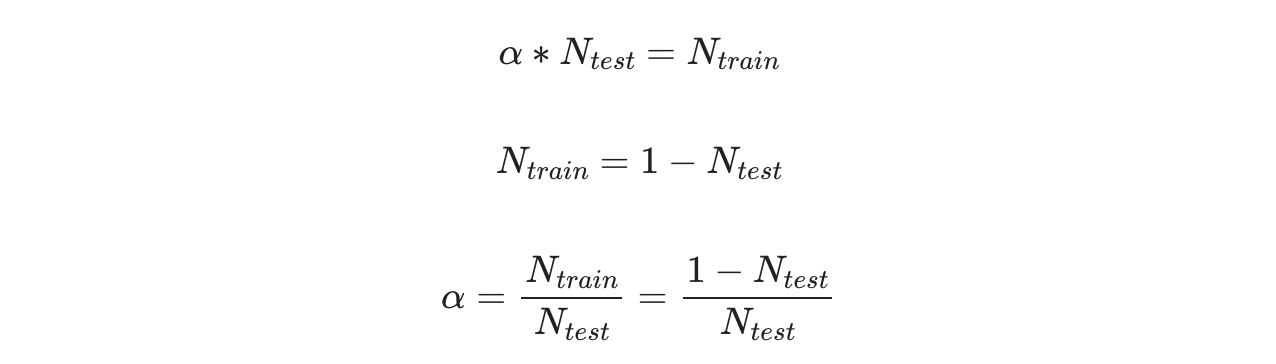

In [11]:
# Validation (adjusted) value counts
val_df.tag.value_counts() * int((1-test_size) / test_size)

tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64

- ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨Ìïú Í≤ÉÏùÑ ÏïåÏàòÏûàÎã§.

## Exploration: EDA

### Intuition

Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò Ïã†Ìò∏ÏôÄ ÎâòÏïôÏä§Î•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌïú ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA).  
Ïù¥Îäî Î¨∏Ï†úÍ∞Ä ÏñºÎßàÎÇò Ïûò Ï†ïÏùòÎêòÏóàÎäîÏßÄÏóê Îî∞Îùº Í∞úÎ∞ú ÌîÑÎ°úÏÑ∏Ïä§Ïùò Îã§ÏñëÌïú ÏãúÏ†ê(ÎùºÎ≤®ÎßÅ Ï†Ñ/ÌõÑ, Ï†ÑÏ≤òÎ¶¨ Îì±)ÏóêÏÑú ÏàòÌñâÌï† Ïàò ÏûàÎäî ÏàúÌôòÏ†ÅÏù∏ ÌîÑÎ°úÏÑ∏Ïä§ÏûÖÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Îç∞Ïù¥ÌÑ∞Ïóê ÎùºÎ≤®ÏùÑ Î∂ôÏù¥Í±∞ÎÇò Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÑ Ïûò Î™®Î•¥Í≤†Îã§Î©¥ EDAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïö∞Î¶¨Îäî Ï¢ÖÏ¢Ö ÏûòÎ™ª Ïù¥Ìï¥ÎêòÎäî Ï§ëÏöîÌïòÍ≥†ÎèÑ Ïû¨ÎØ∏ÏûàÎäî ÌîÑÎ°úÏÑ∏Ïä§Ïù∏ EDAÎ°ú ÌîÑÎ°úÏ†ùÌä∏Î•º ÏãúÏûëÌïòÎ†§Í≥† Ìï©ÎãàÎã§.  
EDAÏóê ÎåÄÌï¥ ÏÉùÍ∞ÅÌïòÎäî Î∞©Î≤ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

- Îã®ÏàúÌûà Ï†ïÌï¥ÏßÑ ÌîåÎ°Ø ÏÑ∏Ìä∏(ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Îì±)Î•º ÏãúÍ∞ÅÌôîÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãôÎãàÎã§.
- Î™©ÌëúÎäî Í∞ÄÏßÄÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûëÏóÖÏóê Ï∂©Î∂ÑÌïòÎã§Îäî Í≤ÉÏùÑ Ïä§Ïä§Î°ú ÌôïÏã†ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Ï§ëÏöîÌïú ÏßàÎ¨∏Ïóê ÎãµÌïòÍ≥† Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º Îçî ÏâΩÍ≤å Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ EDAÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- ÏùºÌöåÏÑ± ÌîÑÎ°úÏÑ∏Ïä§Í∞Ä ÏïÑÎãàÎùº Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Î∂ÑÌè¨ Î≥ÄÌôî, Ïù¥ÏÉÅ ÏßïÌõÑ Îì±ÏùÑ Ìè¨Ï∞©ÌïòÍ∏∞ ÏúÑÌï¥ EDAÎ•º Îã§Ïãú Î∞©Î¨∏Ìï¥Ïïº Ìï©ÎãàÎã§.   

EDAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™á Í∞ÄÏßÄ Ï£ºÏöî ÏßàÎ¨∏Ïóê ÎãµÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn  as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [13]:
df.head()

id           created_on                                              title   
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...  \
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

### target distribution

ÌÉúÍ∑∏Ïàò Ï∞æÍ∏∞

In [14]:
all_tags = Counter(df.tag)
all_tags

Counter({'natural-language-processing': 310,
         'computer-vision': 285,
         'other': 106,
         'mlops': 63})

In [15]:
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

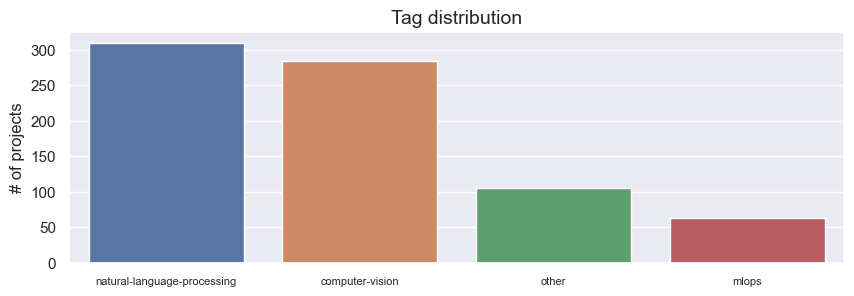

In [16]:
# Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

ÏïΩÍ∞ÑÏùò Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ ÏûàÏßÄÎßå Í∑∏Î¶¨ ÎÇòÏÅòÏßÄÎäî ÏïäÏäµÎãàÎã§.  
Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö© ÎπàÎèÑÍ∞Ä ÎÇÆÏùÄ ÌÅ¥ÎûòÏä§Îäî Ïò§Î≤Ñ ÏÉòÌîåÎßÅÌïòÍ≥† Ïù∏Í∏∞ ÏûàÎäî ÌÅ¥ÎûòÏä§Îäî Ïñ∏Îçî ÏÉòÌîåÎßÅÌïòÍ±∞ÎÇò ÏÜêÏã§ Ìï®ÏàòÏóê ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπòÎ•º Ï†ÅÏö©ÌïòÎäî Îì± Îã§ÏñëÌïú Ï†ÑÎûµÏù¥ ÏûàÏäµÎãàÎã§.

### Wordcloud

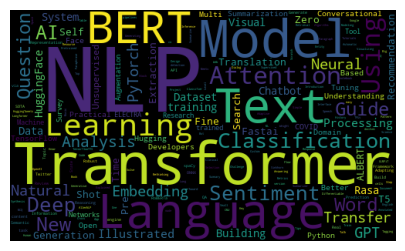

In [17]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

Ï†úÎ™© ÌÖçÏä§Ìä∏ Í∏∞Îä•Ïóê Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ï¢ãÏùÄ Ïã†Ìò∏Í∞Ä ÏûàÍ≥† Ïö∞Î¶¨Ïùò ÏßÅÍ¥ÄÍ≥º ÏùºÏπòÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.  
ÏÑ§Î™Ö ÌÖçÏä§Ìä∏ Í∏∞Îä•Ïóê ÎåÄÌï¥ÏÑúÎèÑ Ïù¥ Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïòÎ©¥ ÎπÑÏä∑Ìïú ÌíàÏßàÏùò Ïã†Ìò∏Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
Ïù¥ Ï†ïÎ≥¥Îäî Î™®Îç∏ÎßÅÏóê Í∏∞Îä•ÏùÑ Ïñ¥ÎñªÍ≤å ÏÇ¨Ïö©Ìï†ÏßÄ Í≤∞Ï†ïÌï† Îïå Ïú†Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§.

Îçî ÎßéÏùÄ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ Ìï† Ïàò ÏûàÏßÄÎßå ÏßÄÍ∏àÏùÄ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ÏôÄ ÌÖçÏä§Ìä∏ Í∏∞Îä•Ïùò ÌíàÏßàÏóê ÎåÄÌïú ÏßàÎ¨∏Ïóê ÎåÄÌïú ÎãµÏùÑ ÏñªÏóàÏäµÎãàÎã§.  
Îã§Ïùå Îã®ÏõêÏóêÏÑúÎäî Î™®Îç∏ ÌïôÏäµÏùÑ Ï§ÄÎπÑÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏùÑ Ï†ÑÏ≤òÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.

## Preprocessing

### Intuition

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Îäî preparationÍ≥º transformationÏù¥ÎùºÎäî Îëê Í∞ÄÏßÄ Ïú†ÌòïÏùò ÌîÑÎ°úÏÑ∏Ïä§Î°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÏäµÎãàÎã§.  
ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Í∏∞Î≤ïÏùÑ ÏÇ¥Ìé¥Î≥∏ Îã§Ïùå Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏùÑ Ï†ÑÏ≤òÎ¶¨Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

Ïñ¥Îñ§ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÎäî Í∏ÄÎ°úÎ≤å(Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÏùå, Ïòà: ÏÜåÎ¨∏Ïûê ÌÖçÏä§Ìä∏, ÎßàÏπ®Ìëú Ï†úÍ±∞ Îì±)Ïù¥Í≥† Ïñ¥Îñ§ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÎäî Î°úÏª¨(Ïñ¥Ìúò, ÌëúÏ§ÄÌôî Îì± ÌïôÏäµ Î∂ÑÌï†ÏóêÏÑúÎßå ÌïôÏäµÎê®, Ïòà: Íµ¨Ï°∞Ï≤¥Îßå ÌïôÏäµÎê®)ÏûÖÎãàÎã§.  
Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Îî∞Îùº Îã¨ÎùºÏßÄÎäî Î°úÏª¨ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÏùò Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂úÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÏóê Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï¥Ïïº Ìï©ÎãàÎã§.

### Preparing

#### joins

Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÏóê SQL Ï°∞Ïù∏ÏùÑ ÏàòÌñâÌïòÏó¨ ÌïÑÏöîÌïú Î™®Îì† Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Î∑∞Î°ú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
Ïù¥Î†áÍ≤å ÌïòÎ©¥ Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏúºÎ°ú Ìõ®Ïî¨ ÏâΩÍ≤å ÏûëÏóÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

```
SELECT * FROM A
INNTER JOIN B on A.id == B.id
```

Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂úÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÌäπÏ†ï ÏãúÏ†êÏùò Ïú†Ìö®Ìïú Ï°∞Ïù∏ÏùÑ ÏàòÌñâÌïòÎèÑÎ°ù Ï£ºÏùòÌï¥Ïïº Ìï©ÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Ï∂îÎ°†Ïù¥ ÌïÑÏöîÌïú ÏãúÏ†êÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏóàÎçò ÌÖåÏù¥Î∏î AÏùò Í∞úÏ≤¥Ïóê ÎåÄÌïú Í∏∞Îä•Ïù¥ ÌÖåÏù¥Î∏î BÏóê ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

#### Missing values

Î®ºÏ†Ä, ÎàÑÎùΩÎêú Í∞íÏù¥ ÏûàÎäî ÌñâÏùÑ ÏãùÎ≥ÑÌï¥Ïïº ÌïòÎ©∞, ÏãùÎ≥ÑÌïú ÌõÑÏóêÎäî Ïù¥Î•º Ï≤òÎ¶¨ÌïòÎäî Î™á Í∞ÄÏßÄ Ï†ëÍ∑º Î∞©ÏãùÏù¥ ÏûàÏäµÎãàÎã§.

- ÎàÑÎùΩÎêú Í∞íÏù¥ ÏûàÎäî ÏÉòÌîå ÏÉùÎûµ(ÏûëÏùÄ ÌïòÏúÑ ÏßëÌï©Îßå ÎàÑÎùΩÎêú Í≤ΩÏö∞)   

```python
# Drop a row (sample) by index
df.drop([4, 10, ...])
# Conditionally drop rows (samples)
df = df[df.value > 0]
# Drop samples with any missing feature
df = df[df.isnull().any(axis=1)]
```

- omit the entire feature (if too many samples are missing the value)   
```python
# Drop a column (feature)
df.drop(["A"], axis=1)
```

- fill in missing values for features (using domain knowledge, heuristics, etc.)   

```python
# Fill in missing values with mean
df.A = df.A.fillna(df.A.mean())
```

- may not always seem "missing" (ex. 0, null, NA, etc.)

```python
# Replace zeros to NaNs
import numpy as np
df.A = df.A.replace({"0": np.nan, 0: np.nan})
```

#### Outliers (anomalies)

- craft assumptions about what is a "normal" expected value

```python
# Ex. Feature value must be within 2 standard deviations
df[np.abs(df.A - df.A.mean()) <= (2 * df.A.std())]
```

- Ï§ëÏöîÌïú Ïù¥ÏÉÅÍ∞í(Ïòà: ÏÇ¨Í∏∞)Ïù¥ Ï†úÍ±∞ÎêòÏßÄ ÏïäÎèÑÎ°ù Ï£ºÏùòÌï¥Ïïº Ìï©ÎãàÎã§.
- Î≥ÄÌôòÏùÑ Ï†ÅÏö©Ìï† Îïå Í∞íÏù¥ Ïù¥ÏÉÅÍ∞íÏù¥ ÏïÑÎãê Ïàò ÏûàÏäµÎãàÎã§(Ïòà: Í±∞Îì≠Ï†úÍ≥±Î≤ï).
- Ïù¥ÏÉÅÍ∞íÏùÄ Ï†ÑÏó≠(Ìè¨Ïù∏Ìä∏), Ïª®ÌÖçÏä§Ìä∏(Ï°∞Í±¥Î∂Ä) ÎòêÎäî ÏßëÌï©(Í∞úÎ≥Ñ Ìè¨Ïù∏Ìä∏Îäî Ïù¥ÏÉÅÍ∞íÏù¥ ÏïÑÎãàÎ©∞ ÏßëÌï© Í∑∏Î£πÏù¥ Ïù¥ÏÉÅÍ∞íÏûÑ) Ïùº Ïàò ÏûàÏäµÎãàÎã§.

#### Feature engineering

ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÄ Í≥†Ïú†Ìïú Î∞©ÏãùÏúºÎ°ú ÌîºÏ≤òÎ•º Í≤∞Ìï©ÌïòÏó¨ Ïã†Ìò∏Î•º Ï∂îÏ∂úÌïòÎäî ÏûëÏóÖÏûÖÎãàÎã§.

```python
# Input
df.C = df.A + df.B
```

ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÄ Ïñ¥Îñ§ ÌîºÏ≤òÎ•º ÏóîÏßÄÎãàÏñ¥ÎßÅÌïòÍ≥† ÏÇ¨Ïö©Ìï†ÏßÄ ÏïàÎÇ¥Ìï¥ Ï§Ñ ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏Í∞ÄÏôÄ ÌòëÎ†•ÌïòÏó¨ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### Cleaning

Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ÏóêÎäî Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïã†Ìò∏Î•º Îçî ÏâΩÍ≤å Ï∂îÏ∂úÌï† Ïàò ÏûàÎèÑÎ°ù Ï†úÏïΩ Ï°∞Í±¥ÏùÑ Ï†ÅÏö©ÌïòÎäî ÏûëÏóÖÏù¥ Ìè¨Ìï®Îê©ÎãàÎã§.

- ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏ ÏßÄÏãùÍ≥º EDA ÏÇ¨Ïö©
- ÌïÑÌÑ∞Î•º ÌÜµÌïú Ï†úÏïΩ Ï°∞Í±¥ Ï†ÅÏö©
- Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï ÏùºÍ¥ÄÏÑ± Î≥¥Ïû•
- ÌäπÏ†ï Ïó¥ Í∞íÏù¥ ÏûàÍ±∞ÎÇò nullÏù∏ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ï†úÍ±∞
- Ïù¥ÎØ∏ÏßÄ(ÏûêÎ•¥Í∏∞, ÌÅ¨Í∏∞ Ï°∞Ï†ï, ÏûêÎ•¥Í∏∞ Îì±)

```python
# Resize
import cv2
dims = (height, width)
resized_img = cv2.resize(src=img, dsize=dims, interpolation=cv2.INTER_LINEAR)
```

- ÌÖçÏä§Ìä∏(ÏÜåÎ¨∏Ïûê, Ïñ¥Í∞Ñ, Î¨∏ÏûêÌôî, Ï†ïÍ∑úÏãù Îì±)

```python
# Lower case the text
text = text.lower()
```

### Transformations
Transforming the data involves feature encoding and engineering.

#### Scaling

- ÏûÖÎ†•Ïùò Í∑úÎ™®Í∞Ä ÌîÑÎ°úÏÑ∏Ïä§Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î™®Îç∏Ïóê ÌïÑÏöîÌï©ÎãàÎã§.
- ÌïôÏäµ Î∂ÑÌï†ÏóêÏÑú Íµ¨Ï°∞Î•º ÌïôÏäµÌïòÍ≥† Îã§Î•∏ Î∂ÑÌï†(Î°úÏª¨)Ïóê Ï†ÅÏö©Ìï©ÎãàÎã§.
- ÌîºÏ≤ò(Ïòà: Î≤îÏ£ºÌòï ÌîºÏ≤ò)Ïóê ÎßπÎ™©Ï†ÅÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅÌïòÏßÄ ÏïäÍ∏∞

- ÌëúÏ§ÄÌôî: Í∞íÏùÑ ÌèâÍ∑† 0, ÌëúÏ§Ä 1Î°ú Ïû¨Ï°∞Ï†ïÌï©ÎãàÎã§.

In [18]:
# Standardization
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:\n", x)
print (f"mean: {np.mean(x):.2f}, std: {np.std(x):.2f}")
x_standardized = (x - np.mean(x)) / np.std(x)
print ("x_standardized:\n", x_standardized)
print (f"mean: {np.mean(x_standardized):.2f}, std: {np.std(x_standardized):.2f}")

x:
 [0.88545489 0.58188338 0.32602568 0.99731216]
mean: 0.70, std: 0.26
x_standardized:
 [ 0.71414552 -0.44033027 -1.41335152  1.13953627]
mean: 0.00, std: 1.00


- min-max: rescale values between a min and max

In [19]:
# Min-max
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
print (f"min: {x.min():.2f}, max: {x.max():.2f}")
x_scaled = (x - x.min()) / (x.max() - x.min())
print ("x_scaled:", x_scaled)
print (f"min: {x_scaled.min():.2f}, max: {x_scaled.max():.2f}")

x: [0.76567673 0.89373331 0.15533872 0.98388597]
min: 0.16, max: 0.98
x_scaled: [0.73663634 0.89119189 0.         1.        ]
min: 0.00, max: 1.00


- binning: convert a continuous feature into categorical using bins

In [20]:
# Binning
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
bins = np.linspace(0, 1, 5) # bins between 0 and 1
print ("bins:", bins)
binned = np.digitize(x, bins)
print ("binned:", binned)

x: [0.94777934 0.96947649 0.80896236 0.78433889]
bins: [0.   0.25 0.5  0.75 1.  ]
binned: [4 4 4 4]


#### Encoding

- Îç∞Ïù¥ÌÑ∞Î•º Ìö®Ïú®Ï†ÅÏù¥Í≥†(Ïã†Ìò∏ Ïú†ÏßÄ) Ìö®Í≥ºÏ†ÅÏúºÎ°ú(Ìå®ÌÑ¥ ÌïôÏäµ, Ïòà: ÏõêÌï´ ÎåÄ ÏûÑÎ≤†Îî©) ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
- Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© : Î≤îÏ£ºÌòï Í∞íÏóê ÎåÄÌïú Í≥†Ïú† Ïù∏Îç±Ïä§
- ÏõêÌï´ Ïù∏ÏΩîÎî© : Î∞îÏù¥ÎÑàÎ¶¨ Î≤°ÌÑ∞Î°ú ÌëúÌòÑ
- ÏûÑÎ≤†Îî© : Îß•ÎùΩÏùÑ ÌëúÌòÑÌïòÍ∏∞ ÏúÑÌïú representation

```python
# Embeddings
self.embeddings = nn.Embedding(
    embedding_dim=embedding_dim, num_embeddings=vocab_size)
x_in = self.embeddings(x_in)
print (x_in.shape)
```
```python
# Í≤∞Í≥º
(len(X), embedding_dim)
```

#### Extraction
- signal extraction from existing features
- combine existing features
- transfer learning: using a pretrained model as a feature extractor and finetuning on it's results
- autoencoders: learn to encode inputs for compressed knowledge representation

- principle component analysis (PCA): linear dimensionality reduction to project data in a lower dimensional space.

In [21]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, 3], [-2, -1, 2], [-3, -2, 1]])
pca = PCA(n_components=2)
pca.fit(X)
print (pca.transform(X))
print (pca.explained_variance_ratio_)
print (pca.singular_values_)

[[-1.44245791 -0.1744313 ]
 [-0.1148688   0.31291575]
 [ 1.55732672 -0.13848446]]
[0.96838847 0.03161153]
[2.12582835 0.38408396]


- counts(ngram): ÌÜ†ÌÅ∞ Í∞úÏàòÏùò ÌñâÎ†¨Î°ú ÌÖçÏä§Ìä∏Î•º Ìù¨ÏÜåÌïòÍ≤å ÌëúÌòÑ - ÌäπÏßï Í∞íÏóê ÏùòÎØ∏ ÏûàÍ≥† Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú Ïã†Ìò∏Í∞Ä ÎßéÏùÄ Í≤ΩÏö∞ Ïú†Ïö©Ìï©ÎãàÎã§.

In [22]:
# Counts (ngram)
from sklearn.feature_extraction.text import CountVectorizer
y = [
    "acetyl acetone",
    "acetyl chloride",
    "chloride hydroxide",
]
vectorizer = CountVectorizer()
y = vectorizer.fit_transform(y)
print (vectorizer.get_feature_names_out())
print (y.toarray())
# üí° Repeat above with char-level ngram vectorizer
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3)) # uni, bi and trigrams

['acetone' 'acetyl' 'chloride' 'hydroxide']
[[1 1 0 0]
 [0 1 1 0]
 [0 0 1 1]]


- similarity: similar to count vectorization but based on similarities in tokens

- and many more!

ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº ÏóîÌã∞Ìã∞(ÏÇ¨Ïö©Ïûê, Ìï≠Î™© Îì±)Ïóê ÎåÄÌïú ÌîºÏ≤ò Í∞íÏùÑ Í≤ÄÏÉâÌïòÍ≥† Ïó¨Îü¨ ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú ÎèôÏùºÌïú ÌîºÏ≤òÎ•º Ïû¨ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞Í∞Ä Ï¢ÖÏ¢Ö ÏûàÏäµÎãàÎã§.   
Ï†ÅÏ†àÌïú ÌîºÏ≤ò Í∞íÏùÑ Í≤ÄÏÉâÌïòÍ≥† ÎÖ∏Î†•Ïùò Ï§ëÎ≥µÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÌîºÏ≤ò Ïä§ÌÜ†Ïñ¥Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

### Implementation

Ïö∞Î¶¨Ïùò Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùò Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏôÄ Í¥ÄÎ†®Îêú Î™á Í∞ÄÏßÄ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÎ•º Íµ¨ÌòÑÌï† Í≤ÉÏûÖÎãàÎã§.

In [23]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

#### Feature engineering

In [24]:
df.head()

id           created_on                                              title   
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...  \
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

Í∏∞Ï°¥ ÏûÖÎ†• ÌîºÏ≤òÎ•º Í≤∞Ìï©ÌïòÏó¨ Î™®Îç∏Ïùò ÌïôÏäµÏùÑ ÎèïÎäî ÏùòÎØ∏ ÏûàÎäî Ïã†Ìò∏Î•º ÏÉàÎ°ú ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§.  
Í∑∏Îü¨ÎÇò ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã§ÏñëÌïú Ï°∞Ìï©ÏùÑ Í≤ΩÌóòÏ†ÅÏúºÎ°ú Ïã§ÌóòÌï¥ Î≥¥ÏßÄ ÏïäÍ≥†Îäî ÌäπÏ†ï ÌîºÏ≤ò Ï°∞Ìï©Ïù¥ ÎèÑÏõÄÏù¥ ÎêòÎäîÏßÄ ÏïÑÎãåÏßÄ Ïïå Ïàò ÏûàÎäî Î∞©Î≤ïÏùÄ ÏóÜÏäµÎãàÎã§.  
Ïó¨Í∏∞ÏÑúÎäî ÌîÑÎ°úÏ†ùÌä∏Ïùò Ï†úÎ™©Í≥º ÏÑ§Î™ÖÏùÑ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏßÄÎßå Ïù¥Î•º Í≤∞Ìï©ÌïòÏó¨ ÌïòÎÇòÏùò ÏûÖÎ†• ÌîºÏ≤òÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [25]:
# input
df["text"] = df.title + " " + df.description

In [26]:
df.head()

id           created_on                                              title   
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...  \
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag   
0  Bringing theory to experiment is cool. We can ...  computer-vision  \
1  The beauty of the work lies in the way it arch...  computer-vision   
2  A collection of important graph embedding, cla...            other   
3  A curated list of Monte Carlo tree search pape...            other   
4  A PyTorch Implementation of "Watch Your Step: ...            other   

                                                text  
0  Comparison between YOLO and RCNN on real world...  
1  Show, Infer & Tell: Contextual Inference for C...  
2  Awesome Graph Classification A collection of i...  
3  Awesome Monte Carlo Tree Search A curated list...  
4  AttentionWalk A PyTorch Implementation of "Wat...

#### Cleaning

ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®Í∏∞ ÎïåÎ¨∏Ïóê Î™á Í∞ÄÏßÄ ÏùºÎ∞òÏ†ÅÏù∏ ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
Ïó¨Í∏∞ÏÑúÎäî ÌååÏù¥Ïç¨Ïùò Í∏∞Î≥∏ Ï†úÍ≥µ Ï†ïÍ∑úÏãù ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù∏ reÏôÄ ÏûêÏó∞Ïñ¥ Ìà¥ÌÇ∑Ïù∏ nltkÎ•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

In [27]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sguys99/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text string."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text

Ïù¥Î™®Ìã∞ÏΩò, Íµ¨ÎëêÏ†ê Îì±ÏùÄ ÏûëÏóÖÏóê ÎßéÏùÄ Ïã†Ìò∏Î•º Ï†ÑÎã¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÎãπÏó∞Ìûà Ìè¨Ìï®ÏãúÌÇ¨ Ïàò ÏûàÏßÄÎßå,  
Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅ¨Îã§Í≥† ÏÉùÍ∞ÅÎêòÎäî Í∏∞Îä•ÏúºÎ°ú Ï¥àÍ∏∞ ÌîºÏ≤ò ÏÑ∏Ìä∏Î•º Îã®ÏàúÌôîÌïú Îã§Ïùå Îã§Î•∏ ÌîºÏ≤òÎ•º Ï≤úÏ≤úÌûà ÎèÑÏûÖÌïòÍ≥† Ïú†Ïö©ÏÑ±ÏùÑ ÌèâÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÏäµÎãàÎã§.

Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≥† ÎÇòÎ©¥ pandas.DataFrame.applyÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Í∞Å ÌñâÏóê Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [29]:
# Apply to dataframe
original_df = df.copy()
df.text = df.text.apply(clean_text)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes


Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌï† Ïàò ÏûàÏùÑ ÎïåÍπåÏßÄ ÌäπÏßïÍ∞í Ï∞®Ïõê Î¨∏Ï†úÎ•º ÏôÑÌôîÌï† Ïàò ÏûàÎèÑÎ°ù ÎπàÎèÑÍ∞Ä ÎÇÆÏïÑÏßÄÎäî ÌäπÏßïÏùÑ ÎèÑÏûÖÌïòÍ±∞ÎÇò ÌòÑÎ™ÖÌïú Î∞©Î≤ï(Ïòà: binning, extract general attributes, common n-grams, mean encoding using other feature values, Îì±)ÏúºÎ°ú Ïù∏ÏΩîÎî©ÌïòÏó¨ ÌäπÏßïÍ∞í Ï∞®Ïõê Î¨∏Ï†úÎ•º ÏôÑÌôîÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

Ïó¥(pandas.DataFrame.drop)Í≥º null ÌÉúÍ∑∏ Í∞íÏù¥ ÏûàÎäî Ìñâ(pandas.DataFrame.dropna)ÏùÑ Ï†úÍ±∞ÌïòÏó¨ Ï†ïÎ¶¨ ÏûëÏóÖÏùÑ ÎßàÎ¨¥Î¶¨ÌïòÍ≤†ÏäµÎãàÎã§.

In [30]:
# DataFrame cleanup
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols
df.head()

text              tag
0  comparison yolo rcnn real world videos bringin...  computer-vision
1  show infer tell contextual inference creative ...  computer-vision
2  awesome graph classification collection import...            other
3  awesome monte carlo tree search curated list m...            other
4  attentionwalk pytorch implementation watch ste...            other

#### Encoding

Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ïà´Ïûê Í∞íÏúºÎ°ú Ïù∏ÏΩîÎî©Ìï¥Ïïº Ìï©ÎãàÎã§. ÌÖçÏä§Ìä∏ Î†àÏù¥Î∏îÏùÑ Í≥†Ïú†Ìïú Ïù∏Îç±Ïä§Î°ú Ïù∏ÏΩîÎî©ÌïòÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§.

In [31]:
train_df.head()

id           created_on   
637  2047  2020-08-05 15:18:46  \
730  2351  2020-09-22 03:42:58   
276   900  2020-05-17 08:14:24   
275   894  2020-05-17 04:47:40   
622  2020  2020-08-01 12:14:26   

                                                 title   
637                        Test-Time Data Augmentation  \
730        Simple Transformers: Transformers Made Easy   
276        A Visual Survey of Data Augmentation in NLP   
275  A Large-Scale, Open-Domain, Mixed-Interface Di...   
622          Text Summarization using TF-IDF Algorithm   

                                           description   
637  Tutorial on how to properly implement test-tim...  \
730  Simple Transformers removes complexity and let...   
276  An extensive overview of text data augmentatio...   
275  Korbit, a large-scale, open-domain, mixed-inte...   
622  This Article explains the TF-IDF algorithm and...   

                             tag  
637                        mlops  
730  natural-language-processing  
276  natural-language-processing  
275  natural-language-processing  
622  natural-language-processing

In [32]:
# Label to index
tags = train_df.tag.unique().tolist()
num_classes = len(tags)
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index

{'mlops': 0,
 'natural-language-processing': 1,
 'computer-vision': 2,
 'other': 3}

Next, we can use the pandas.Series.map function to map our class_to_index dictionary on our tag column to encode our labels.

In [33]:
# Encode labels
df["tag"] = df["tag"].map(class_to_index)
df.head()

text  tag
0  comparison yolo rcnn real world videos bringin...    2
1  show infer tell contextual inference creative ...    2
2  awesome graph classification collection import...    3
3  awesome monte carlo tree search curated list m...    3
4  attentionwalk pytorch implementation watch ste...    3

ÎòêÌïú ÏòàÏ∏°ÏùÑ Îã§Ïãú ÌÖçÏä§Ìä∏ Î†àÏù¥Î∏îÎ°ú ÎîîÏΩîÎî©Ìï† Ïàò ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.  
index_to_class ÏÇ¨Ï†ÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ïù¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏îÏùÑ Îã§Ïãú ÌÖçÏä§Ìä∏ Î†àÏù¥Î∏îÎ°ú Î≥ÄÌôòÌïòÎ©¥ Îê©ÎãàÎã§.

In [34]:
def decode(indices, index_to_class):
    return [index_to_class[index] for index in indices]

In [35]:
index_to_class = {v:k for k, v in class_to_index.items()}
decode(df.head()["tag"].values, index_to_class=index_to_class)

['computer-vision', 'computer-vision', 'other', 'other', 'other']

#### Tokenizer

Îã§ÏùåÏúºÎ°ú ÌÖçÏä§Ìä∏ÎèÑ Ïù∏ÏΩîÎî©ÌïòÍ≤†ÏäµÎãàÎã§.  
ÎûúÎç§ ÎîïÏÖîÎÑàÎ¶¨Î•º ÏÇ¨Ïö©ÌïòÎäî ÎåÄÏã† ÏÇ¨Ï†Ñ ÌïôÏäµÎêú LLM(scibert)Ïóê ÏÇ¨Ïö©Îêú ÌÜ†ÌÅ∞Ìôî ÎèÑÍµ¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ÌôîÌï©ÎãàÎã§.  
ÎÇòÏ§ëÏóê Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Îïå Ïù¥ Ï†ïÌôïÌïú Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ Ï°∞Ï†ïÌï† Í≤ÉÏûÖÎãàÎã§.

In [36]:
import numpy as np
from transformers import BertTokenizer

ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎäîÎäî ÏûÖÎ†• ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ ID Î¶¨Ïä§Ìä∏ÏôÄ Ïñ¥ÌÖêÏÖò ÎßàÏä§ÌÅ¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.  
ÌÜ†ÌÅ∞ IDÎäî Ïñ¥ÌúòÏóê Ìè¨Ìï®Îêú ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§ÏûÖÎãàÎã§. Ïñ¥ÌÖêÏÖò ÎßàÏä§ÌÅ¨Îäî Î™®Îç∏Ïù¥ ÌÜ†ÌÅ∞ Ïù∏Îç±Ïä§Ïóê ÏßëÏ§ëÌï† Ïàò ÏûàÎèÑÎ°ù ÌÜ†ÌÅ∞ Ïù∏Îç±Ïä§Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î∞îÏù¥ÎÑàÎ¶¨ ÎßàÏä§ÌÅ¨ÏûÖÎãàÎã§(Ìå®Îìú ÌÜ†ÌÅ∞ÏùÄ Î¨¥Ïãú).

In [37]:
# Bert tokenizer
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
text = "Transfer learning with transformers for text classification."
encoded_inputs = tokenizer([text], return_tensors="np", padding="longest")  # pad to longest item in batch
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])
print (tokenizer.decode(encoded_inputs["input_ids"][0]))

input_ids: [[  102  2268  1904   190 29155   168  3267  2998   205   103]]
attention_mask: [[1 1 1 1 1 1 1 1 1 1]]
[CLS] transfer learning with transformers for text classification. [SEP]


ÌÜ†ÌÅ∞ÎÇòÏù¥Ï†Ä Ìï®ÏàòÏóêÏÑú padding="longest"Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î∞∞ÏπòÏóêÏÑú Í∞ÄÏû• Í∏¥ Ìï≠Î™©ÏúºÎ°ú ÏûÖÎ†•ÏùÑ Ìå®Îî©ÌïúÎã§Îäî Ï†êÏóê Ïú†ÏùòÌïòÏÑ∏Ïöî.  
Ïù¥Îäî ÎÇòÏ§ëÏóê ÏûÖÎ†• Î∞∞ÏπòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ÏÑú Í∑†ÏùºÌïú ÏûÖÎ†• ÌÅ¨Í∏∞Î•º ÎßåÎì§Í≥†Ïûê Ìï† Îïå Ï§ëÏöîÌï¥ÏßÄÎ©∞,  
ÏßßÏùÄ ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Îäî Î∞∞ÏπòÏóêÏÑú Í∞ÄÏû• Í∏¥ ÏûÖÎ†•Ïùò Í∏∏Ïù¥Ïóê ÎßûÍ≤å 0ÏúºÎ°ú Ìå®Îî©Îê©ÎãàÎã§.

ÌÜ†ÌÅ∞ÌôîÎ•º tokenize Ìï®ÏàòÎ°ú ÎûòÌïëÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∞∞ÏπòÎ•º ÌÜ†ÌÅ∞ÌôîÌïòÎäî Îç∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [38]:
def tokenize(batch):
    tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
    encoded_inputs = tokenizer(batch["text"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=encoded_inputs["input_ids"], masks=encoded_inputs["attention_mask"], targets=np.array(batch["tag"]))

In [39]:
# Tokenization
tokenize(df.head(1))

{'ids': array([[  102,  2029,  1778,   609,  6446,  4857,  1332,  2399, 13572,
         19125,  1983,  1954,  6240,  3717,  7434,  1262,   537,   201,
          1040,   545,  4714,   103]]),
 'masks': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'targets': array([2])}

#### Best prectice  

Î™®Îì† Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ Ï°∞Ìï©Ìï®

In [40]:
def preprocess(df, class_to_index):
    """Preprocess the data."""
    df["text"] = df.title + " " + df.description  # feature engineering
    df["text"] = df.text.apply(clean_text)  # clean text
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
    df = df[["text", "tag"]]  # rearrange columns
    df["tag"] = df["tag"].map(class_to_index)  # label encoding
    outputs = tokenize(df)
    return outputs

In [41]:
# Apply
preprocess(df = train_df, class_to_index=class_to_index)

{'ids': array([[  102,   856,   532, ...,     0,     0,     0],
        [  102,  2177, 29155, ...,     0,     0,     0],
        [  102,  2180,  3241, ...,     0,     0,     0],
        ...,
        [  102,   453,  2068, ...,  5730,   432,   103],
        [  102, 11268,  1782, ...,     0,     0,     0],
        [  102,  1596,   122, ...,     0,     0,     0]]),
 'masks': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'targets': array([0, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1,
        1, 1, 1, 1, 2, 1, 2, 0, 3, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 3, 3,
        3, 0, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 1, 1, 3, 1, 0,
        1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 1,
        1, 1, 3, 3, 0, 2, 3, 2, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 0, 0, 2,
        1, 1, 2, 2, 1, 1, 0, 3, 1